# Part I - Exploratory Data Analysis of the Ford GoBike System Data
## by Heba Daraghmeh

### Table of Contect

<ul>
    <li><a href='#intro'> Introduction </a></li>
    <li><a href='#prewran'> Preliminary Wrangling </a></li>
    <li><a href='#str'> Structure of The Dataset </a></li>
    <li><a href='#mainf'> Main feature of interest </a></li>
    <li><a href='#uni'> Univariate Exploration </a></li>
    <li><a href='#bi'> Bivariate Exploration </a></li>
    <li><a href='#mul'> Multivariate Exploration </a></li>
    <li><a href='#conc'> Conclusions </a></li>
</ul>

<a id='intro'></a>
## Introduction

The Ford GoBike System Data dataset provides detailed information about individual rides made in a bike-sharing system operating in the greater San Francisco Bay area. This dataset is a rich source of information for analyzing bike-sharing patterns, user behavior, and other related aspects.

### **Dataset Overview**
* **Name:** Ford GoBike System Data
* **Size:** Approximately 38 MB
* **Format:** CSV (Comma-Separated Values)
* **Source:** Kaggle Dataset

<a id='prewran'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_facet_grid(data, col, row, x_column, title='', xlabel='', ylabel='', bins=30, plott=sns.histplot):
    g = sns.FacetGrid(data, col=col, row=row, margin_titles=True, height=3)
    g.map_dataframe(plott, x=x_column, bins=bins, color='blue')
    g.set_axis_labels(xlabel, ylabel)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.fig.suptitle(title, y=1.02)
    plt.show()

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id='str'></a>
### Structure of The Dataset

> The Ford GoBike System Data dataset consists of individual records of bike-sharing trips, each represented by a row in the dataset. The dataset includes 16 columns, capturing various aspects of each ride, including trip duration, start and end times, station details, bike IDs, user information, and more.

> Structure Details:

> **Number of Rows:** Each row represents a single bike-sharing trip.
**Number of Columns:** 16
**Column Types:** The columns include both categorical and continuous data types, as well as timestamps and geographical coordinates.

> **Features**
The dataset contains the following columns:

> * **duration_sec:** Duration of the ride in seconds. This is a continuous variable that indicates how long each trip lasted.
> * **start_time:** Timestamp when the ride started. This includes both date and time.
> * **end_time:** Timestamp when the ride ended. This includes both date and time.
> * **start_station_id:** Unique identifier for the starting station of the ride.
> * **start_station_name:** Name of the starting station.
> * **start_station_latitude:** Latitude coordinate of the starting station.
> * **start_station_longitude:** Longitude coordinate of the starting station.
> * **end_station_id:** Unique identifier for the ending station of the ride.
> * **end_station_name:** Name of the ending station.
> * **end_station_latitude:** Latitude coordinate of the ending station.
> * **end_station_longitude:** Longitude coordinate of the ending station.
> * **bike_id:** Unique identifier for the bike used in the ride.
> * **user_type:** Type of user (e.g., subscriber or customer). This is a categorical variable.
> * **member_birth_year:** Birth year of the bike-sharing system member. This helps in understanding the age distribution of users.
> * **member_gender:** Gender of the bike-sharing system member (e.g., male, female, other). This is a categorical variable.
> * **bike_share_for_all_trip:** Boolean flag indicating whether the trip was part of a bike-share program for all (e.g., a public initiative).

<a id='mainf'></a>
### Main feature of interest

> The main features of interest depending on the questions we want to explore:

> * **duration_sec:** To analyze trip duration patterns and usage frequency.
> * **start_time and end_time:** To examine temporal patterns in bike usage.
> * **start_station_id and end_station_id:** To identify popular start and end stations.
> * **user_type:** To explore differences between subscribers and customers.
> * **member_birth_year and member_gender:** To investigate user demographics and their impact on bike usage.
> * **bike_share_for_all_trip:** To evaluate the usage of bikes shared for public programs.

<a id='uni'> </a>
## Univariate Exploration

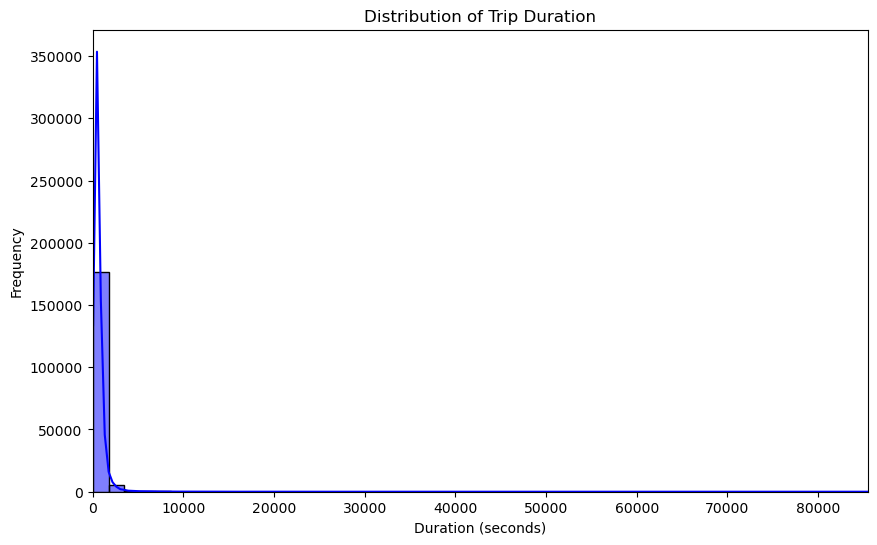

In [5]:
# Plot histogram of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_sec'], bins=50, kde=True, color='blue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, df['duration_sec'].max())
plt.show()

In [6]:
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

The histogram is extremely skewed towards shorter trip durations, with almost all trips having very short durations. This lack of variation could indicate an anomaly or error in data collection or entry.Or because the long trips are rarely made so they are little.

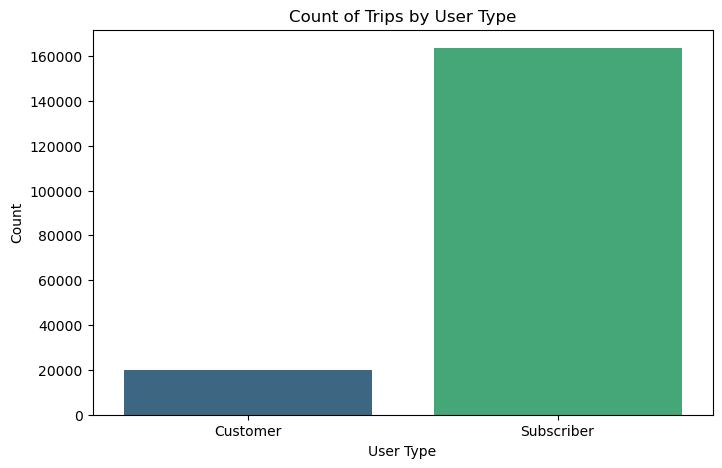

In [7]:
# Plot bar chart of user types
plt.figure(figsize=(8, 5))
sns.countplot(x='user_type', data=df, palette='viridis')
plt.title('Count of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

The “Subscriber” bar reaches up to 160,000 trips, while the “Customer” bar is just above 20,000 trips.
There is a substantial disparity between the two user types, with Subscribers taking far more trips than Customers. 

<a id='bi'></a>
## Bivariate Exploration

> **Question:** Is there a relationship between the trip duration and the latitude of the start station?

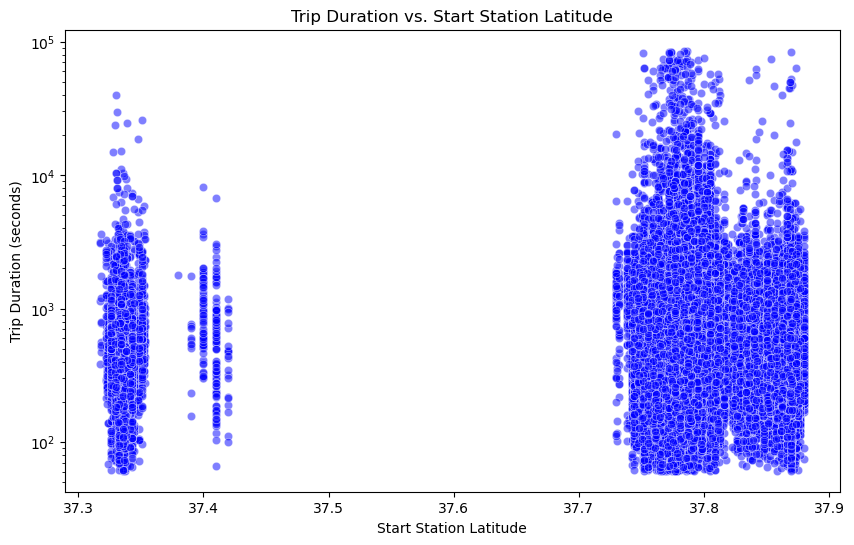

In [8]:
# Plot scatter plot of trip duration vs. start station latitude 
# and use log scale for better visualization of wide range of trip durations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_station_latitude', y='duration_sec', data=df, alpha=0.5, color='blue')
plt.title('Trip Duration vs. Start Station Latitude')
plt.xlabel('Start Station Latitude')
plt.ylabel('Trip Duration (seconds)')
plt.yscale('log')  
plt.show()

The vertical lines indicate that at certain latitudes, there is a wide range of trip durations. This could be due to popular start stations located at these latitudes.


> **Question:** How does trip duration vary between different user types?

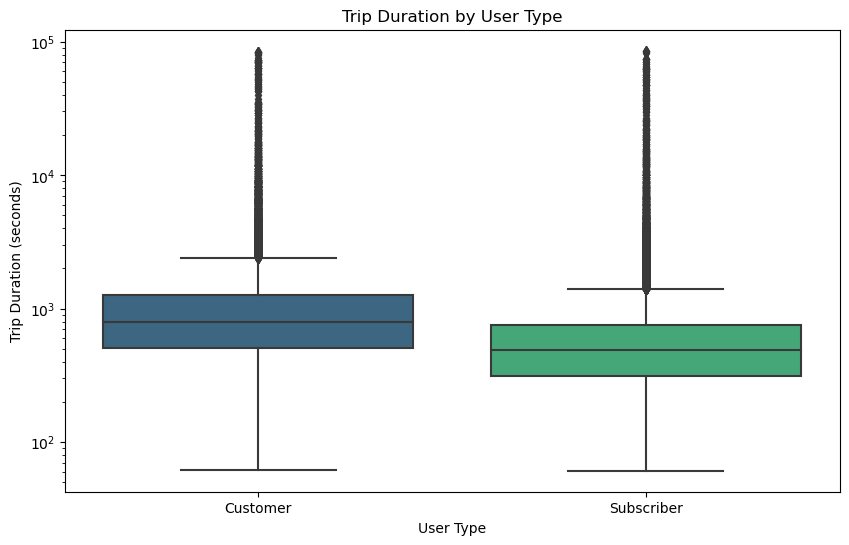

In [9]:
# Plot box plot of trip duration by user type
# and use log scale for better visualization of wide range of trip durations
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_sec', data=df, palette='viridis')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.yscale('log') 
plt.show()

The higher IQR for customers might indicate that they use the service for a variety of trip lengths, whereas subscribers might have more consistent usage patterns, helps them finish the trip faster.

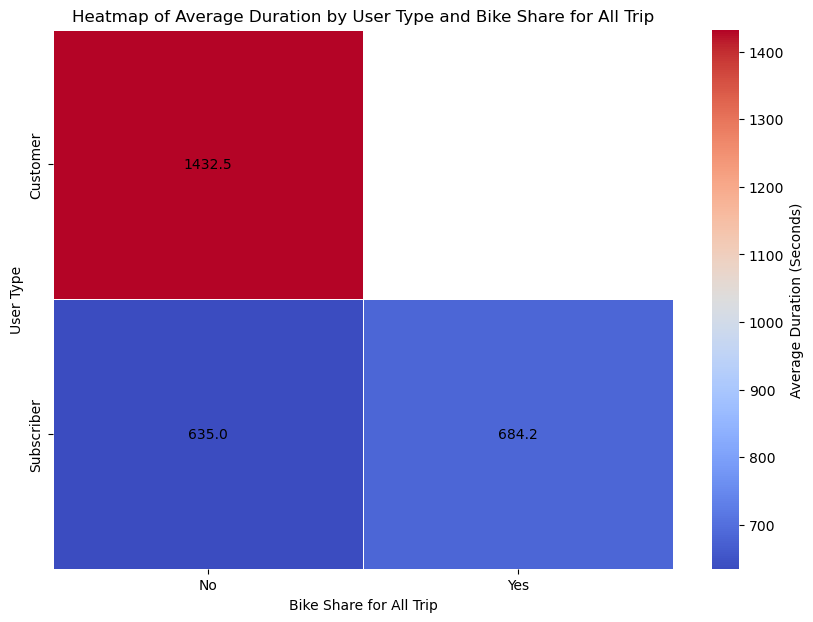

In [10]:

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(
    index='user_type',
    columns='bike_share_for_all_trip',
    values='duration_sec',
    aggfunc='mean'
)

plt.figure(figsize=(10, 7))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    annot=True,
    fmt=".1f",
    annot_kws={'color': 'black'},  # Set annotation text color to black
    linewidths=.5,
    cbar_kws={'label': 'Average Duration (Seconds)'}
)
plt.title('Heatmap of Average Duration by User Type and Bike Share for All Trip')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('User Type')
plt.show()



Usage Patterns: Customers who do not participate in the bike share for all trips tend to have longer trip durations compared to subscribers and those who do participate. This could suggest different usage patterns or needs between these groups.
Subscriber Consistency: Subscribers have relatively consistent average trip durations, regardless of their participation in the bike share for all trips program.

<a id='mul'></a>
## Multivariate Exploration

> **Question** How does trip duration vary by user type and member gender?

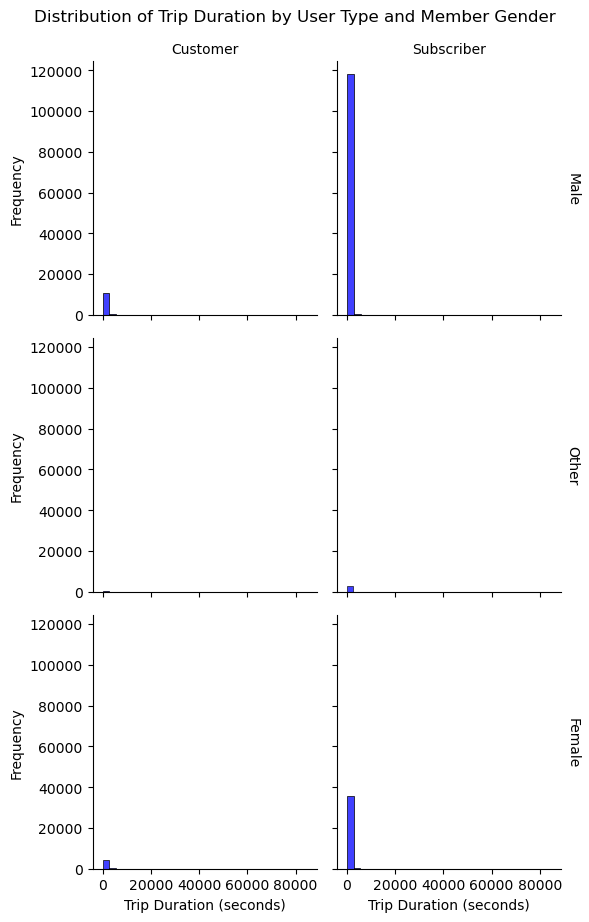

In [11]:
plot_facet_grid(df, 'user_type', 'member_gender', 'duration_sec', title='Distribution of Trip Duration by User Type and Member Gender', xlabel='Trip Duration (seconds)', ylabel='Frequency',plott=sns.histplot)


The “Other” category has a significantly lower frequency of trips compared to “Male” and “Female” categories. This might indicate a smaller user base or different usage patterns.
Despite the differences in frequency, the overall pattern of trip durations (sharp peak at lower durations) is consistent across all genders and user types.

Explore the distribution of bike_share_for_all_trip with respect to user_type and member_gender.

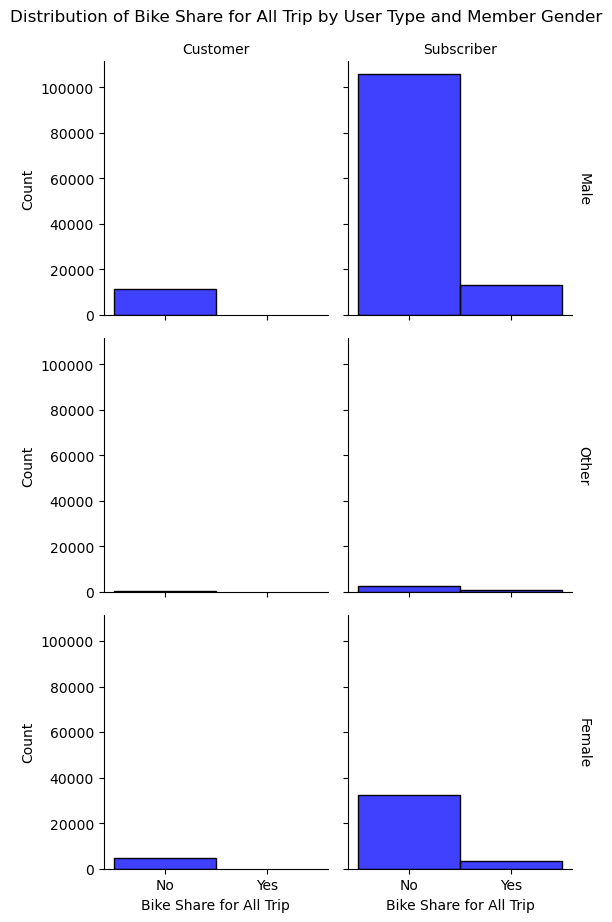

In [12]:
# Explore the distribution of bike_share_for_all_trip with respect to user_type and member_gender.
plot_facet_grid(df, 'user_type', 'member_gender', 'bike_share_for_all_trip', title='Distribution of Bike Share for All Trip by User Type and Member Gender', xlabel='Bike Share for All Trip', ylabel='Count',plott=sns.histplot)


For all genders and user types, the “No” category has significantly higher counts than the “Yes” category. This indicates that a majority of users do not participate in the “Bike Share for All Trips” program.
The overall counts are higher for subscribers compared to customers, indicating that subscribers might be more engaged or have a larger user base.

<a id='conc'></a>
## Conclusions

* The data consistently shows that most trips are short, and this pattern holds across different user types and genders.
* The counts for “Male” and “Female” users are much higher compared to the “Other” gender category, suggesting a larger user base for these genders.
* The overall counts are higher for subscribers compared to customers, indicating that subscribers might be more engaged or have a larger user base.
* There is low participation in the “Bike Share for All Trips” program, which might need better promotion or incentives to increase engagement.